# Import Library yang Dibutuhkan

In [120]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings

# Memuat dan Memahami Data

In [121]:
csa = pd.read_csv("/kaggle/input/cybersecurity-attacks-dataset/cybersecurity_attacks.csv")
csa

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,...,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source
0,2023-05-30 06:33:58,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,Qui natus odio asperiores nam. Optio nobis ius...,...,Logged,Low,Reyansh Dugal,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment A,"Jamshedpur, Sikkim",150.9.97.135,Log Data,NaN,Server
1,2020-08-26 07:08:30,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,Data,HTTP,Aperiam quos modi officiis veritatis rem. Omni...,...,Blocked,Low,Sumer Rana,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment B,"Bilaspur, Nagaland",NaN,Log Data,NaN,Firewall
2,2022-11-13 08:23:25,63.79.210.48,198.219.82.17,16811,53600,UDP,306,Control,HTTP,Perferendis sapiente vitae soluta. Hic delectu...,...,Ignored,Low,Himmat Karpe,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Segment C,"Bokaro, Rajasthan",114.133.48.179,Log Data,Alert Data,Firewall
3,2023-07-02 10:38:46,163.42.196.10,101.228.192.255,20018,32534,UDP,385,Data,HTTP,Totam maxime beatae expedita explicabo porro l...,...,Blocked,Medium,Fateh Kibe,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_11_5; ...,Segment B,"Jaunpur, Rajasthan",NaN,NaN,Alert Data,Firewall
4,2023-07-16 13:11:07,71.166.185.76,189.243.174.238,6131,26646,TCP,1462,Data,DNS,Odit nesciunt dolorem nisi iste iusto. Animi v...,...,Blocked,Low,Dhanush Chad,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...,Segment C,"Anantapur, Tripura",149.6.110.119,NaN,Alert Data,Firewall
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,2023-05-26 14:08:42,26.36.109.26,121.100.75.240,31005,6764,UDP,1428,Control,HTTP,Quibusdam ullam consequatur consequuntur accus...,...,Logged,Medium,Adira Madan,Mozilla/5.0 (iPad; CPU iPad OS 14_2_1 like Mac...,Segment A,"Nashik, Manipur",NaN,Log Data,Alert Data,Firewall
39996,2023-03-27 00:38:27,17.21.163.81,196.108.134.78,2553,28091,UDP,1184,Control,HTTP,Quaerat neque esse. Animi expedita natus commo...,...,Logged,High,Rati Dara,Mozilla/5.0 (Windows; U; Windows 98; Win 9x 4....,Segment C,"Vadodara, Mizoram",60.51.30.46,Log Data,NaN,Firewall
39997,2022-03-31 01:45:49,162.35.217.57,98.107.0.15,22505,25152,UDP,1043,Data,DNS,Enim at aspernatur illum. Saepe numquam eligen...,...,Blocked,Low,Samiha Joshi,Mozilla/5.0 (Windows; U; Windows NT 4.0) Apple...,Segment C,"Mahbubnagar, Himachal Pradesh",NaN,Log Data,Alert Data,Server
39998,2023-09-22 18:32:38,208.72.233.205,173.79.112.252,20013,2703,UDP,483,Data,FTP,Officiis dolorem sed harum provident earum dis...,...,Ignored,Low,Rasha Chauhan,Mozilla/5.0 (X11; Linux i686) AppleWebKit/536....,Segment B,"Rourkela, Arunachal Pradesh",137.76.130.8,Log Data,NaN,Server


In [122]:
csa.columns

Index(['Timestamp', 'Source IP Address', 'Destination IP Address',
       'Source Port', 'Destination Port', 'Protocol', 'Packet Length',
       'Packet Type', 'Traffic Type', 'Payload Data', 'Malware Indicators',
       'Anomaly Scores', 'Alerts/Warnings', 'Attack Type', 'Attack Signature',
       'Action Taken', 'Severity Level', 'User Information',
       'Device Information', 'Network Segment', 'Geo-location Data',
       'Proxy Information', 'Firewall Logs', 'IDS/IPS Alerts', 'Log Source'],
      dtype='object')

In [123]:
csa.shape

(40000, 25)

In [124]:
csa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Timestamp               40000 non-null  object 
 1   Source IP Address       40000 non-null  object 
 2   Destination IP Address  40000 non-null  object 
 3   Source Port             40000 non-null  int64  
 4   Destination Port        40000 non-null  int64  
 5   Protocol                40000 non-null  object 
 6   Packet Length           40000 non-null  int64  
 7   Packet Type             40000 non-null  object 
 8   Traffic Type            40000 non-null  object 
 9   Payload Data            40000 non-null  object 
 10  Malware Indicators      20000 non-null  object 
 11  Anomaly Scores          40000 non-null  float64
 12  Alerts/Warnings         19933 non-null  object 
 13  Attack Type             40000 non-null  object 
 14  Attack Signature        40000 non-null

# Pembersihan Data

In [125]:
csa.isnull().sum()

Timestamp                     0
Source IP Address             0
Destination IP Address        0
Source Port                   0
Destination Port              0
Protocol                      0
Packet Length                 0
Packet Type                   0
Traffic Type                  0
Payload Data                  0
Malware Indicators        20000
Anomaly Scores                0
Alerts/Warnings           20067
Attack Type                   0
Attack Signature              0
Action Taken                  0
Severity Level                0
User Information              0
Device Information            0
Network Segment               0
Geo-location Data             0
Proxy Information         19851
Firewall Logs             19961
IDS/IPS Alerts            20050
Log Source                    0
dtype: int64

In [126]:
# Menghapus kolom dengan banyak nilai yang hilang
columns_to_drop = ['Malware Indicators', 'Alerts/Warnings', 'Proxy Information', 'Firewall Logs', 'IDS/IPS Alerts']
csa = csa.drop(columns_to_drop, axis=1)

In [127]:
csa.isnull().sum()

Timestamp                 0
Source IP Address         0
Destination IP Address    0
Source Port               0
Destination Port          0
Protocol                  0
Packet Length             0
Packet Type               0
Traffic Type              0
Payload Data              0
Anomaly Scores            0
Attack Type               0
Attack Signature          0
Action Taken              0
Severity Level            0
User Information          0
Device Information        0
Network Segment           0
Geo-location Data         0
Log Source                0
dtype: int64

In [128]:
csa.duplicated().sum()

0

In [129]:
# Mengonversi kolom 'Timestamp' ke objek datetime
csa['Timestamp'] = pd.to_datetime(csa['Timestamp'])

# Visualisasi Data

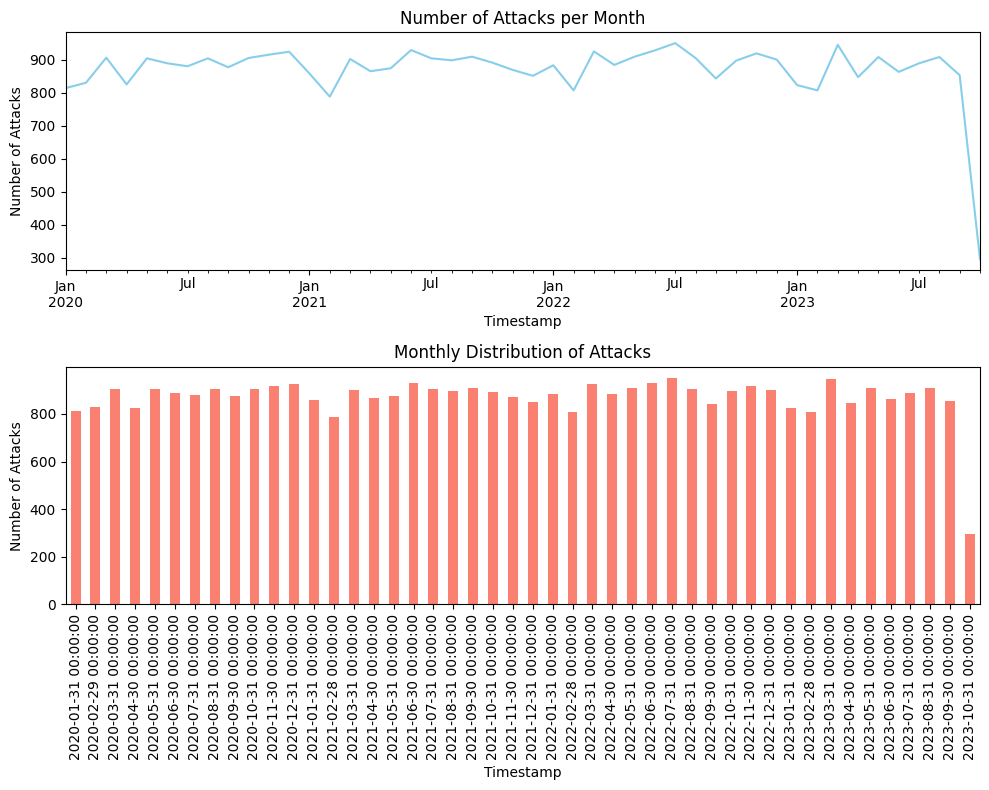

In [130]:
# Melakukan resampling data per bulan dan menghitung jumlah serangan per bulan
monthly_attacks = csa.resample('M', on='Timestamp')['Attack Type'].count()

# Membuat figure dan axis untuk subplot
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

# Plot jumlah serangan per bulan
monthly_attacks.plot(ax=ax[0], color='skyblue')
ax[0].set_title('Number of Attacks per Month')
ax[0].set_ylabel('Number of Attacks')

# Plot diagram batang jumlah total serangan per bulan
monthly_attacks.plot(kind='bar', ax=ax[1], color='salmon')
ax[1].set_title('Monthly Distribution of Attacks')
ax[1].set_ylabel('Number of Attacks')

# Tampilkan plot
plt.tight_layout()
plt.show()

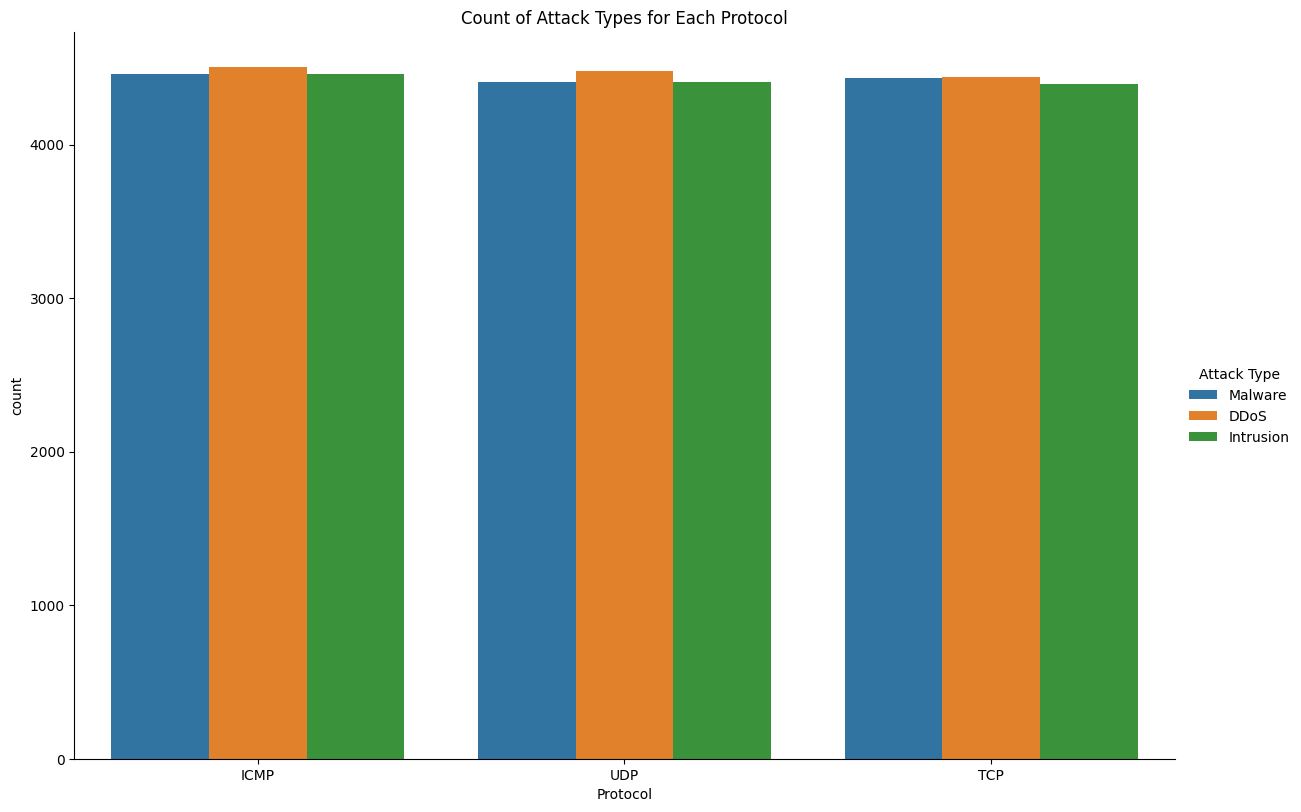

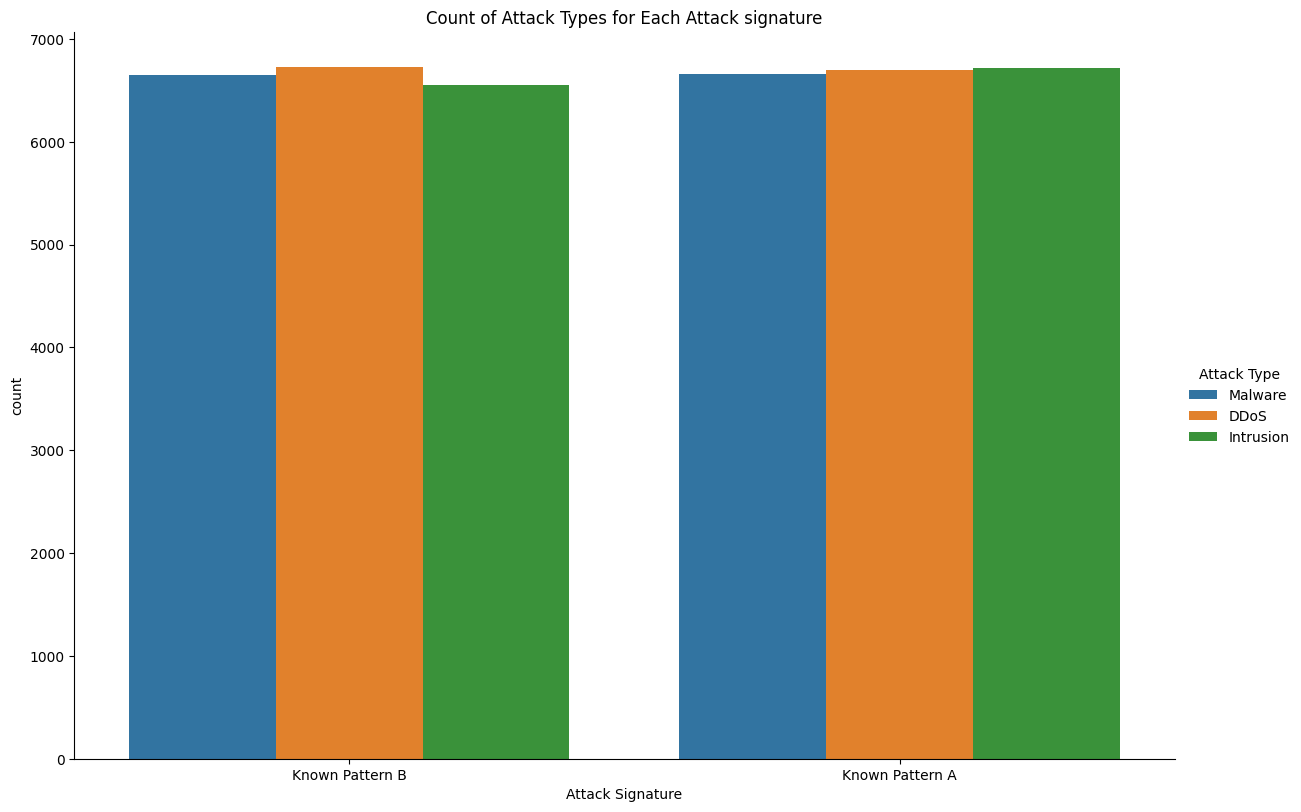

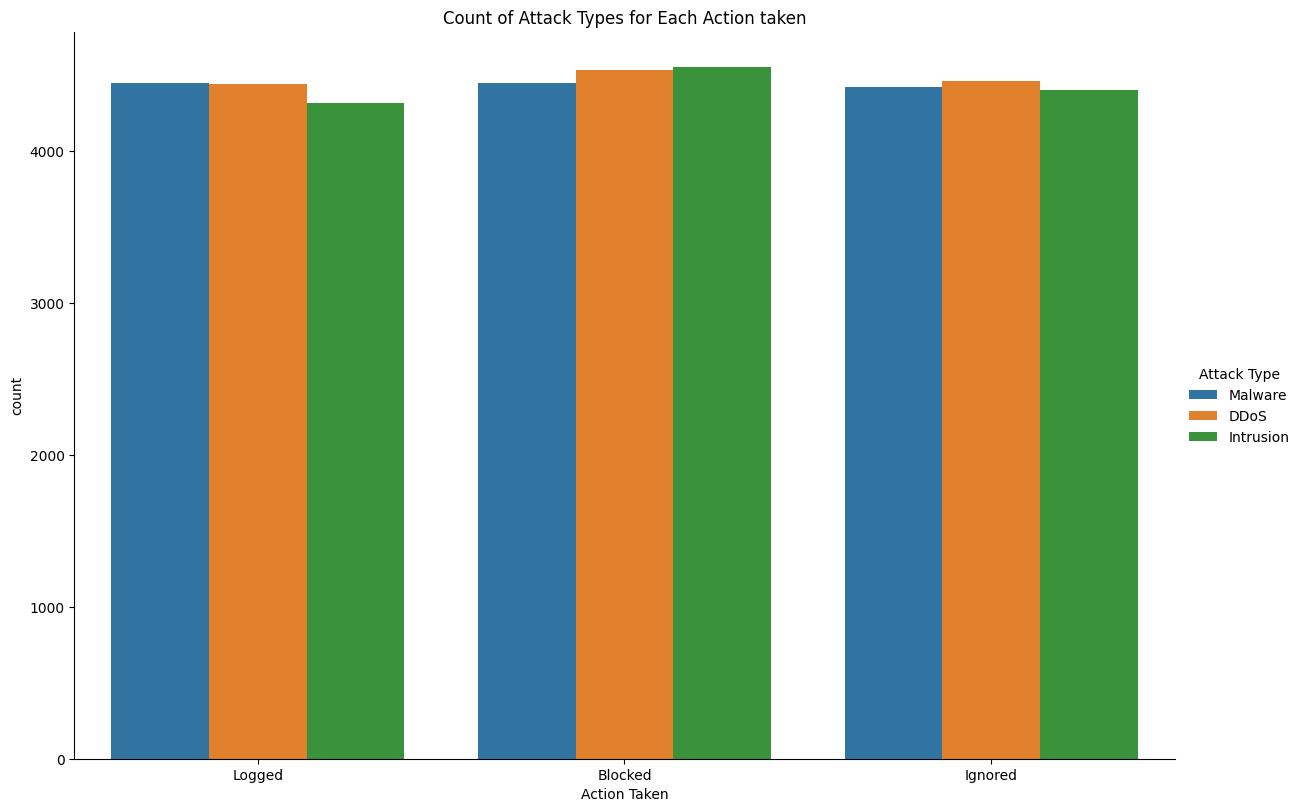

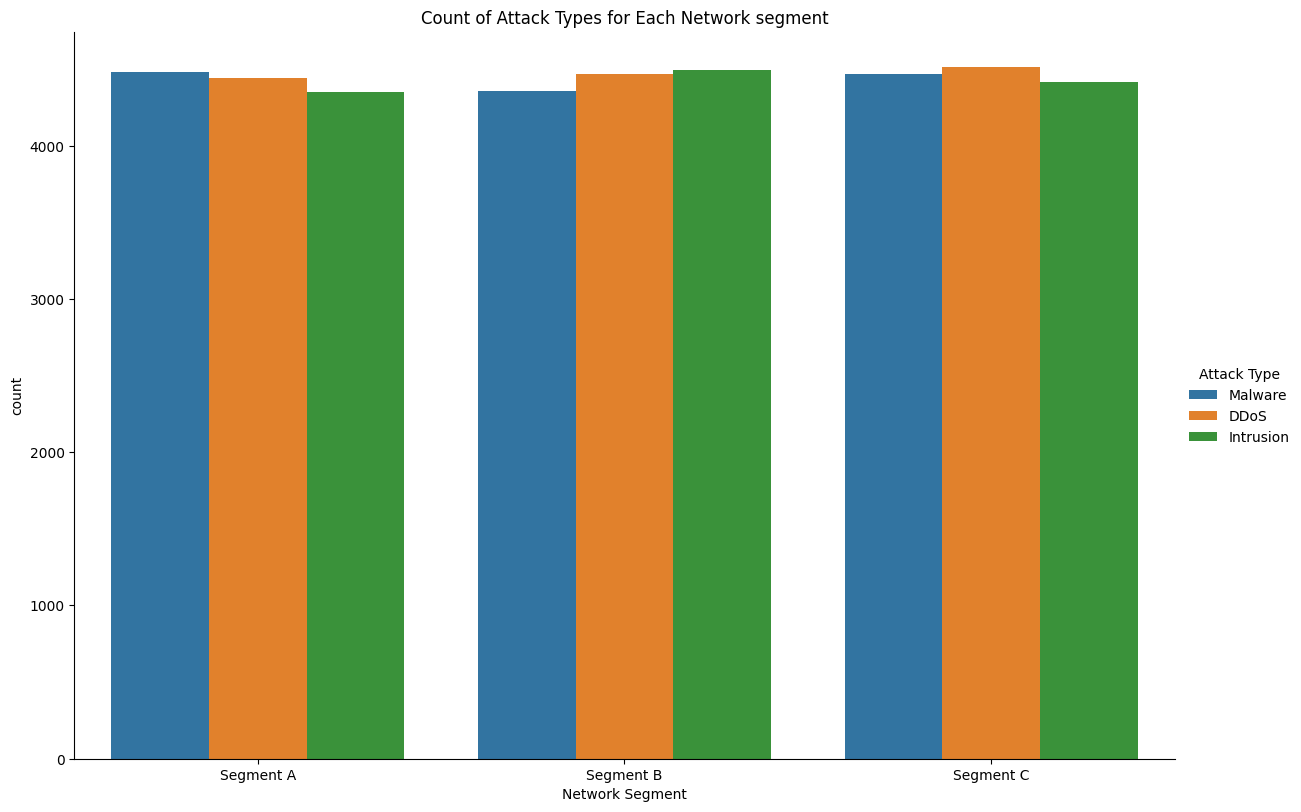

In [131]:
# Menekan peringatan
warnings.filterwarnings("ignore")

# Daftar kolom yang akan diplot
columns_to_plot = ['Protocol', 'Attack Signature', 'Action Taken', 'Network Segment']

# Membuat diagram batang untuk setiap kolom
for col in columns_to_plot:
    sns.catplot(data=csa, x=col, hue='Attack Type', kind='count', height=8, aspect=1.5)
    plt.title(f'Count of Attack Types for Each {col.capitalize()}')
    plt.show()
    
# Mengembalikan filter peringatan ke pengaturan default
warnings.filterwarnings("default")

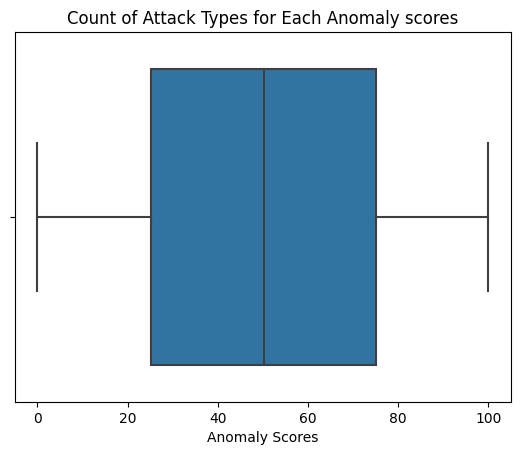

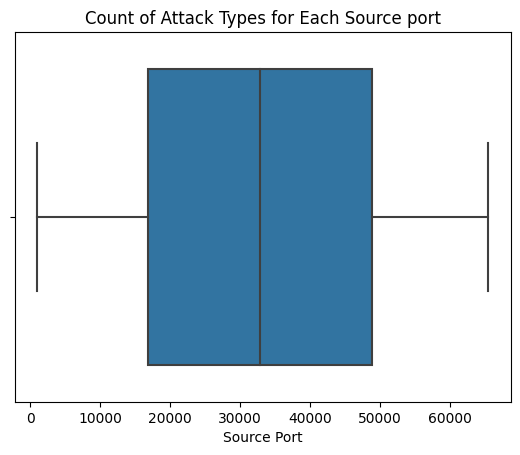

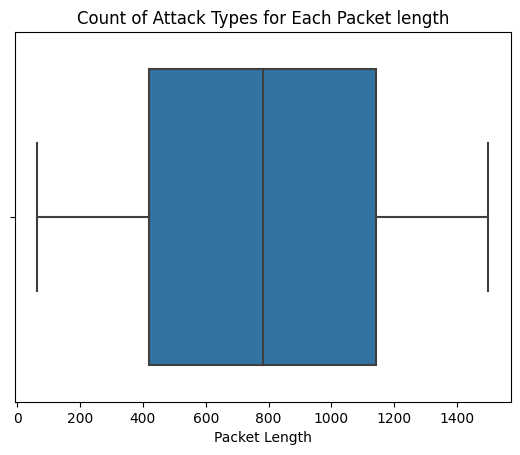

In [132]:
# Kolom-kolom yang akan diplot
columns = ['Anomaly Scores', 'Source Port', 'Packet Length']

# Membuat box plot untuk setiap kolom
for col in columns:
    sns.boxplot(data=csa, x=col, hue='Attack Type')
    plt.title(f'Count of Attack Types for Each {col.capitalize()}')
    plt.show()

# Pemilihan Fitur dan Pembagian Data

In [133]:
# Memilih fitur-fitur dan target
X = csa[['Anomaly Scores', 'Source Port', 'Packet Length']]
y = csa['Action Taken'].map({'Blocked': 1, 'Logged': 0, 'Ignored': 0})

# Membagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Pelatihan Model

In [134]:
# Menginisialisasi model Random Forest dengan parameter yang dioptimalkan
model = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)

# Melatih model menggunakan data pelatihan
model.fit(X_train, y_train)

# Mengevaluasi akurasi model pada data pengujian
accuracy = model.score(X_test, y_test)
print("Model Accuracy:", accuracy)

# Membuat objek StratifiedKFold dengan 5 lipatan
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Validasi silang dengan model yang diperbarui
cv_scores = cross_val_score(model, X, y, cv=stratified_kfold)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Model Accuracy: 0.6613333333333333
Cross-Validation Scores: [0.66225  0.661125 0.662    0.661375 0.661875]
Mean CV Accuracy: 0.661725


# Metrik Evaluasi

In [135]:
# Mengevaluasi kinerja dengan metrik tambahan
y_pred = model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.66      1.00      0.80      7941
           1       0.37      0.00      0.00      4059

    accuracy                           0.66     12000
   macro avg       0.52      0.50      0.40     12000
weighted avg       0.56      0.66      0.53     12000

Confusion Matrix:
 [[7929   12]
 [4052    7]]


# Prediksi pada Data Baru

In [136]:
new_data = pd.DataFrame({'Anomaly Scores': [15.79],
                         'Source Port': [12345],
                         'Packet Length': [1500]})

# Melakukan prediksi pada data baru
prediction = model.predict(new_data)

# Menampilkan hasil deteksi
print("Detection Result:", prediction)

Detection Result: [0]


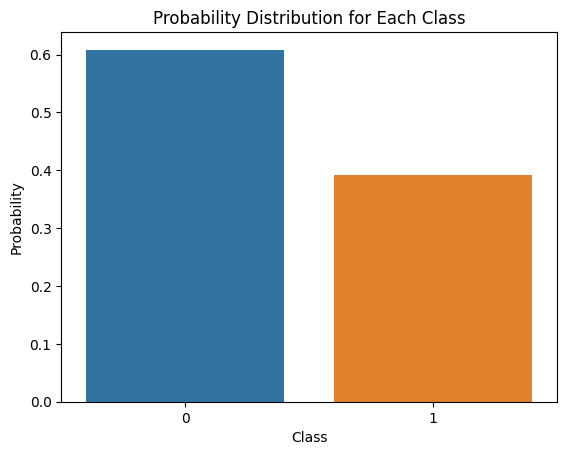

In [137]:
# Visualisasi hasil prediksi pada data baru
sns.barplot(x=model.classes_, y=model.predict_proba(new_data)[0])
plt.title('Probability Distribution for Each Class')
plt.xlabel('Class')
plt.ylabel('Probability')
plt.show()